In [1]:
import pandas as pd
import matplotlib.pyplot as plt
PATH = "ludnosc.csv"
df_ludnosc = pd.read_csv(PATH, sep = ';', decimal = ',')

df_ludnosc.pop("Unnamed: 8")
indexes = df_ludnosc[df_ludnosc.Rok == 1998].index
df_ludnosc.drop(indexes, inplace=True)
df_ludnosc

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut
0,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,1999,31428.0,gosp.,NaN
1,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2000,36163.0,gosp.,NaN
2,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2001,31847.0,gosp.,NaN
3,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2002,32342.0,gosp.,NaN
4,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2003,32452.0,gosp.,NaN
...,...,...,...,...,...,...,...,...
25869,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2016,19.9,%,NaN
25870,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2017,19.5,%,NaN
25871,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2018,19.5,%,NaN
25872,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2019,19.3,%,NaN


In [25]:
region = df_ludnosc.Nazwa.unique()
rok = df_ludnosc.Rok.unique()

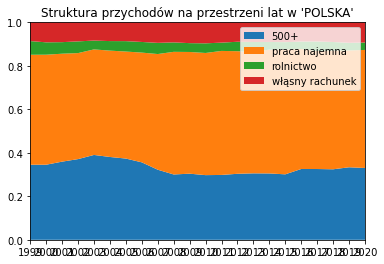

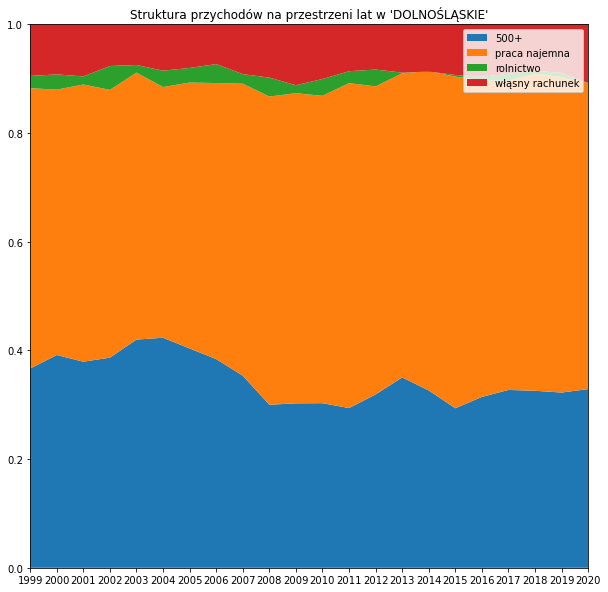

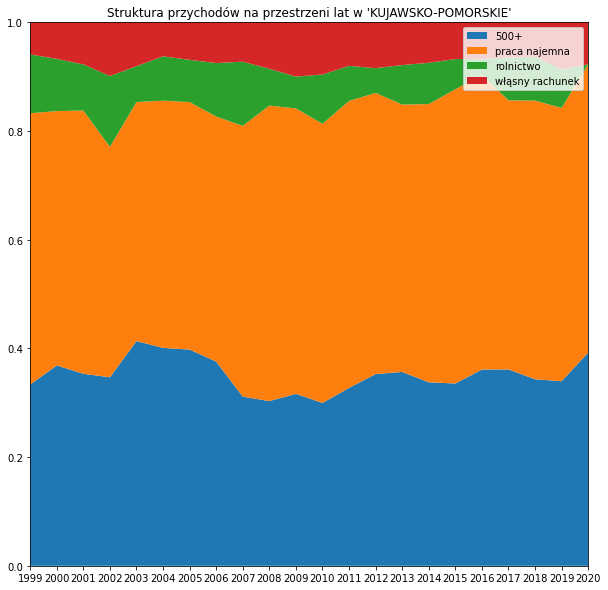

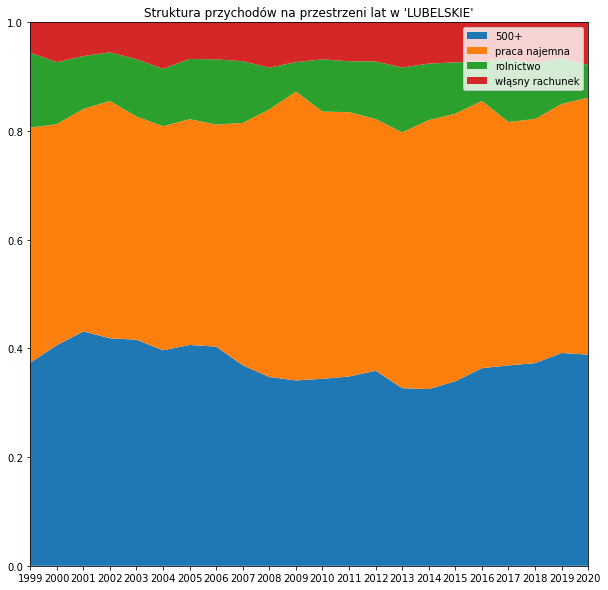

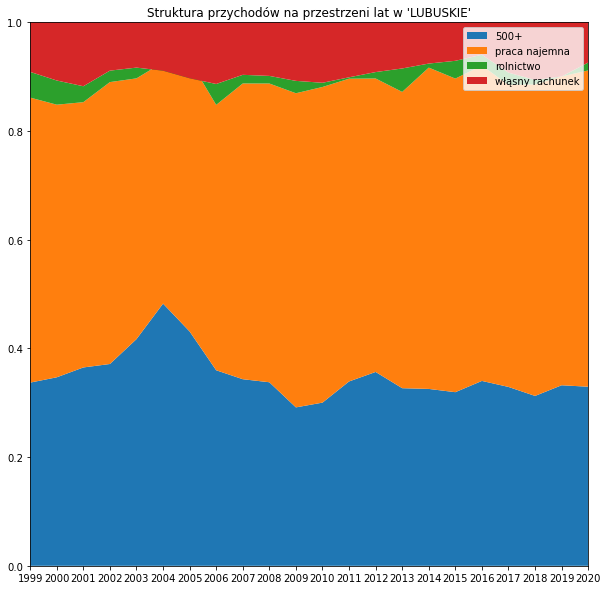

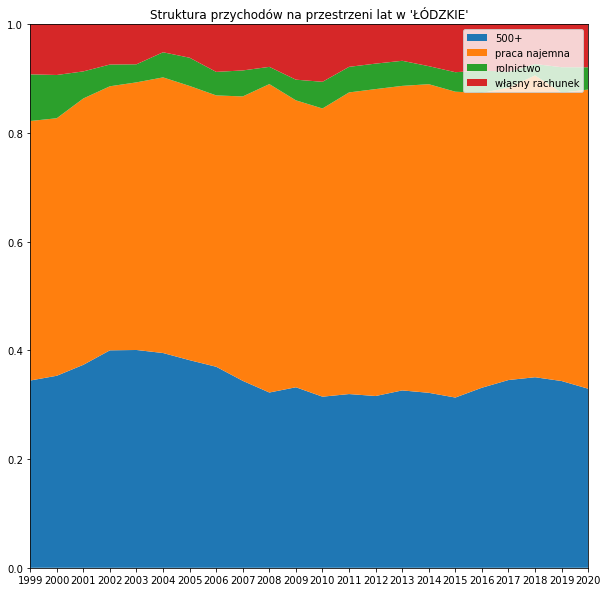

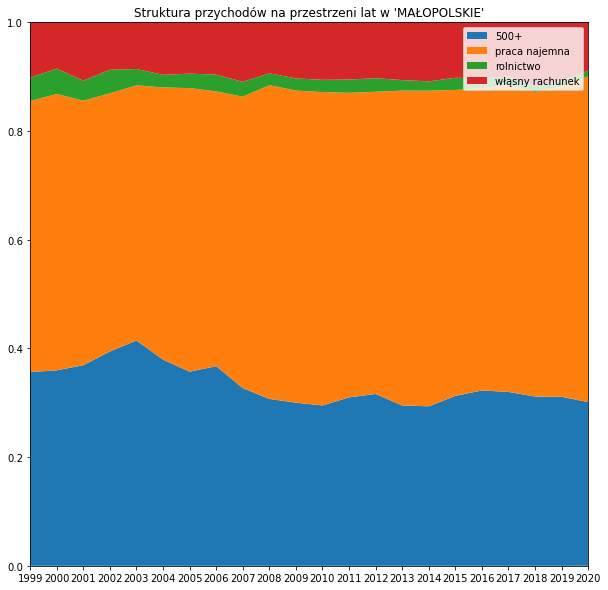

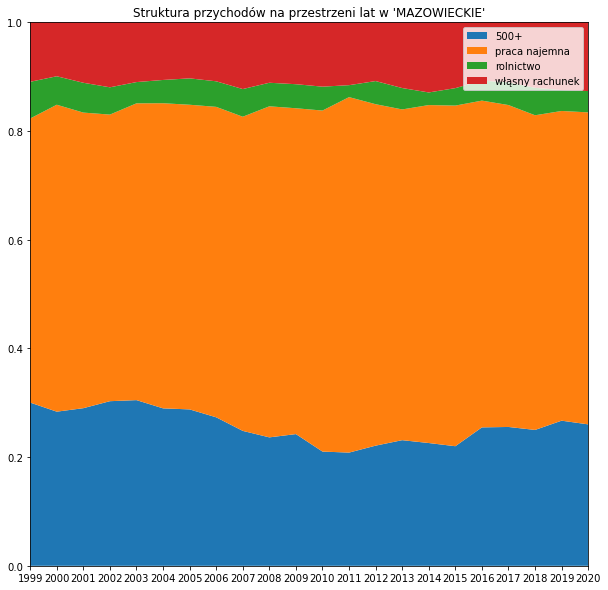

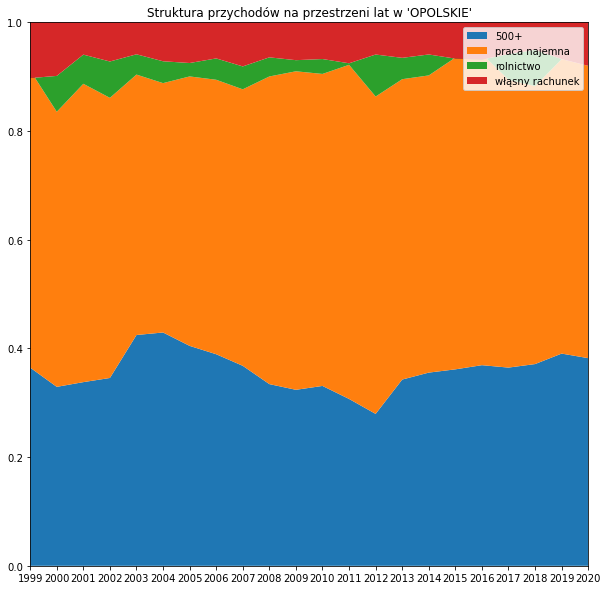

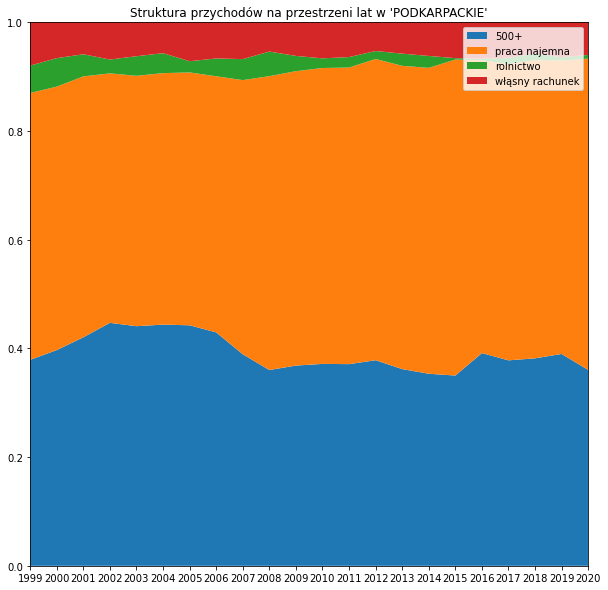

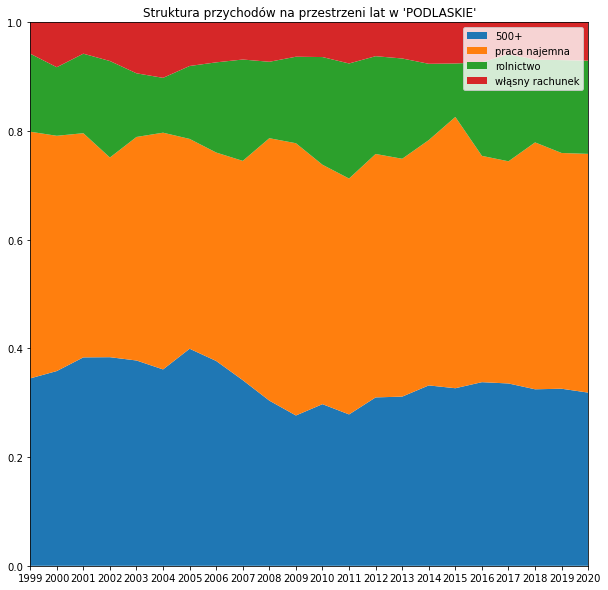

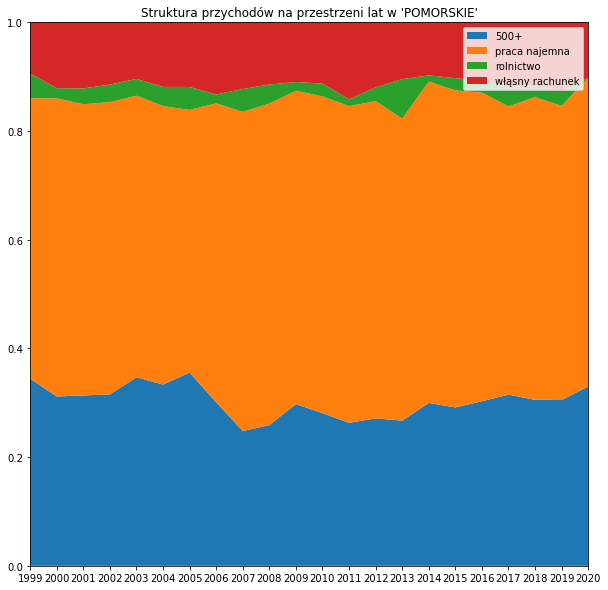

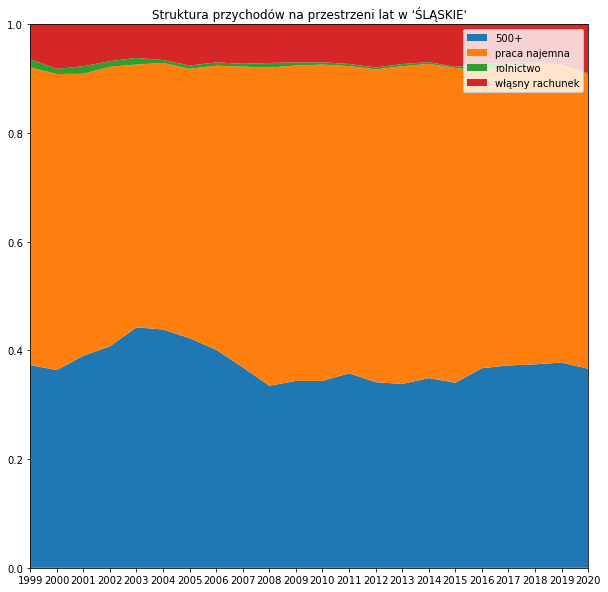

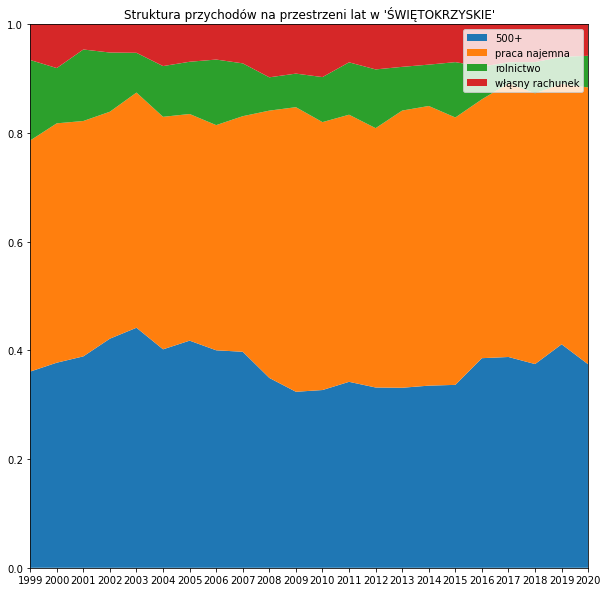

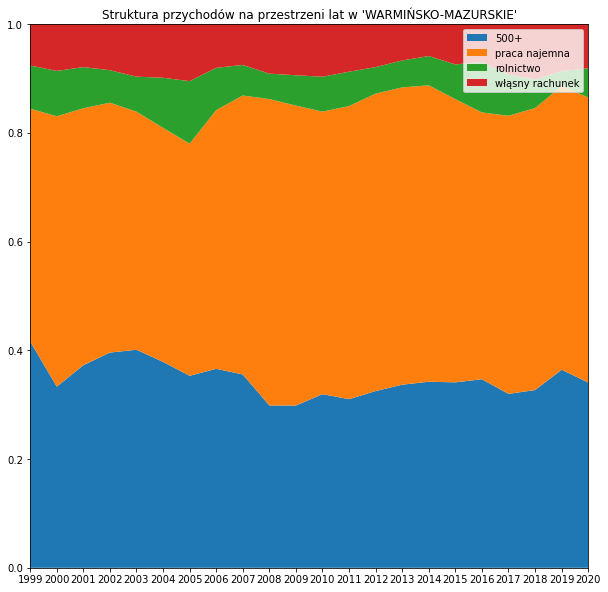

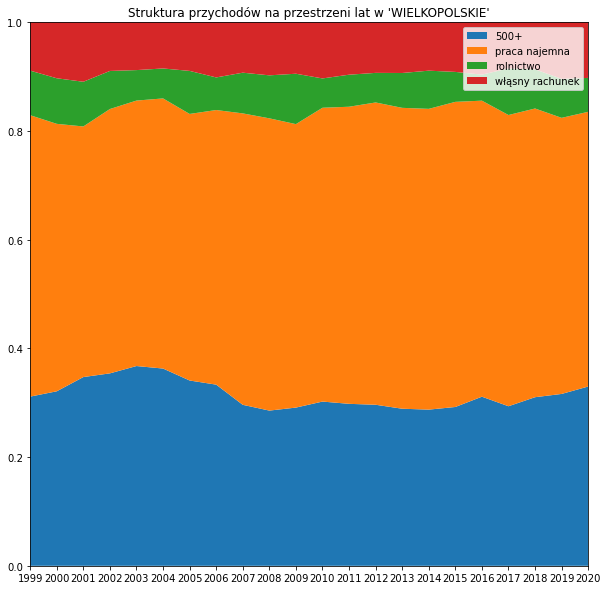

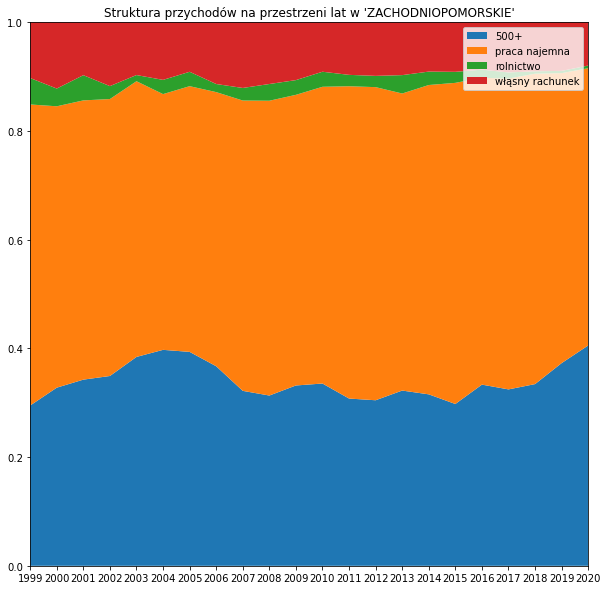

<Figure size 720x720 with 0 Axes>

In [44]:
for i in range (0, len(region)):
    plus500 = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "ze świadczeń społecznych") & (df_ludnosc.Nazwa == region[i])]
    najemna = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "z pracy najemnej") &(df_ludnosc.Nazwa == region[i])]
    rolnictwo = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "z gospodarstwa indywidualnego w rolnictwie") & (df_ludnosc.Nazwa == region[i])]
    wlasny_rachunek = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "z pracy na własny rachunek") & (df_ludnosc.Nazwa == region[i])]
    data = {'500+' : plus500.Wartosc.values,
       'praca najemna' : najemna.Wartosc.values,
       'rolnictwo' : rolnictwo.Wartosc.values,
       'wlasny rachunek' : wlasny_rachunek.Wartosc.values}
    df_rodzaj_zarobkow = pd.DataFrame(data)
    data_perc = df_rodzaj_zarobkow.divide(df_rodzaj_zarobkow.sum(axis=1), axis=0)
    plt.stackplot(rok,  data_perc["500+"],  data_perc["praca najemna"],  data_perc["rolnictwo"], data_perc['wlasny rachunek'], labels=['500+','praca najemna','rolnictwo', 'włąsny rachunek'])
    plt.legend(loc='best')
    plt.margins(0,0)
    plt.title('Struktura przychodów na przestrzeni lat w %r' %region[i])
    plt.xticks(rok)
    plt.figure(figsize= (10,10))

In [ ]:
for i in range (0, len(region)):
    plus500 = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "ze świadczeń społecznych") & (df_ludnosc.Nazwa == region[i])]
    najemna = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "z pracy najemnej") &(df_ludnosc.Nazwa == region[i])]
    rolnictwo = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "z gospodarstwa indywidualnego w rolnictwie") & (df_ludnosc.Nazwa == region[i])]
    wlasny_rachunek = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == "z pracy na własny rachunek") & (df_ludnosc.Nazwa == region[i])]
    data = {'500+' : plus500.Wartosc.values,
       'praca najemna' : najemna.Wartosc.values,
       'rolnictwo' : rolnictwo.Wartosc.values,
       'wlasny rachunek' : wlasny_rachunek.Wartosc.values}
    df_rodzaj_zarobkow = pd.DataFrame(data)
    data_perc = df_rodzaj_zarobkow.divide(df_rodzaj_zarobkow.sum(axis=1), axis=0)
    data_perc["Rok"] = rok
    plt.stackplot(data_perc["Rok"],  data_perc["500+"],  data_perc["praca najemna"],  data_perc["rolnictwo"], data_perc['wlasny rachunek'], labels=['500+','praca najemna','rolnictwo', 'włąsny rachunek'])
    plt.legend(loc='best')
    plt.margins(0,0)
    plt.title('Struktura przychodów na przestrzeni lat w %r' %region[i])
    plt.show()